In [129]:
# Imports
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore")

In [130]:
data0001_3 = np.genfromtxt("../data/task3_1.0e-03.csv", delimiter=",")
data0001_4 = np.genfromtxt("../data/task4_1.0e-03.csv", delimiter=",")
datas = [data0001_3, data0001_4]
dts = [0.001, 0.001]
temperature = [500, 700]
pressure = [1, 1]

In [131]:
velocities_solid = np.genfromtxt("../data/task3_velocity.csv", delimiter=",")[:, :-1]
positions_solid = np.genfromtxt("../data/task3_positions.csv", delimiter=",")[:, :-1]
velocities_liquid = np.genfromtxt("../data/task4_velocity.csv", delimiter=",")[:, :-1]
positions_liquid = np.genfromtxt("../data/task4_positions.csv", delimiter=",")[:, :-1]

In [132]:
v_solid = velocities_solid.reshape(-1, 256, 3)
p_solid = positions_solid.reshape(-1, 256, 3)
v_liquid = velocities_liquid.reshape(-1, 256, 3)
p_liquid = positions_liquid.reshape(-1, 256, 3)
vs = [v_solid, v_liquid[60000:]]
ps = [p_solid, p_liquid]

In [133]:
def plot(data, t, dt, temperature, pressure):
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
    #fig.suptitle(f"Energy, temperature, pressure, and the lattice constant plotted against time, dt = {dt}.\nSystem equilibrated at {temperature} C and {pressure} bar.")
    ax[0, 0].grid(True)
    ax[0, 0].plot(t, data[:, 0], label="Potential")
    ax[0, 0].plot(t, data[:, 1], label="Kinetic")
    ax[0, 0].plot(t, data[:, 0] + data[:, 1], label="Total")
    ax[0, 0].set_xlabel("Time (ps)")
    ax[0, 0].set_ylabel("Energy (eV)")
    ax[0, 0].legend()
    ax[0, 1].grid(True)
    #ax[0, 1].plot(t, np.cumsum(data[:, 2] - 273.15) / (t / dt), label="Temperature", c="purple")
    ax[0, 1].plot(t, data[:, 2] - 273.15, label="Temperature", c="purple")
    ax[0, 1].set_xlabel("Time (ps)")
    ax[0, 1].set_ylabel("Temperature ($^{\circ}C$)")
    ax[0, 1].legend()
    #ax[1, 0].plot(t, np.cumsum(data[:, 3] / 0.00000624) / (t / dt))
    ax[1, 0].plot(t, data[:, 3] / 0.00000624)
    ax[1, 0].grid(True)
    ax[1, 0].set_xlabel("Time (ps)")
    ax[1, 0].set_ylabel("Pressure (bar)")
    ax[1, 1].plot(t, data[:, 4])
    ax[1, 1].set_xlabel("Time (ps)")
    ax[1, 1].set_ylabel("Lattice constant (Å)")
    ax[1, 1].grid(True)
    plt.show()

def plot_positions(data, t, dt, temperature, pressure):
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))
    #fig.suptitle(f"The positions of random particles plotted against time.\nSystem equilibrated at {temperature} C and {pressure} bar.")
    ax[0, 0].plot(t, data[:, 5], label="x")
    ax[0, 0].plot(t, data[:, 6], label="y")
    ax[0, 0].plot(t, data[:, 7], label="z")
    ax[0, 0].set_xlabel("Time (ps)")
    ax[0, 0].set_ylabel("Position")
    ax[0, 0].legend()
    ax[0, 1].plot(t, data[:, 8], label="x")
    ax[0, 1].plot(t, data[:, 9], label="y")
    ax[0, 1].plot(t, data[:, 10], label="z")
    ax[0, 1].set_xlabel("Time (ps)")
    ax[0, 1].set_ylabel("Position")
    ax[0, 1].legend()
    ax[1, 0].plot(t, data[:, 11], label="x")
    ax[1, 0].plot(t, data[:, 12], label="y")
    ax[1, 0].plot(t, data[:, 13], label="z")
    ax[1, 0].set_xlabel("Time (ps)")
    ax[1, 0].set_ylabel("Position")
    ax[1, 0].legend()
    ax[1, 1].plot(t, data[:, 14], label="x")
    ax[1, 1].plot(t, data[:, 15], label="y")
    ax[1, 1].plot(t, data[:, 16], label="z")
    ax[1, 1].set_xlabel("Time (ps)")
    ax[1, 1].set_ylabel("Position")
    ax[1, 1].legend()
    plt.show()

def plot_misc(data, t, ylabel):
    plt.plot(t, data)
    plt.xlabel("Time (ps)")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

def plot_velocity_correlation(data, dt):
    a = data.reshape(-1, 1000, 256, 3)
    accum = np.zeros(a.shape[1])
    for batch in a: # Batches
        for i in range(a.shape[2]): # Atoms 
            for j in range(a.shape[3]): # x, y, z
                accum += autocorr(batch[:, i, j])
    accum /= np.prod(a.shape)
    t = np.arange(a.shape[1]) * dt
    plt.plot(t, accum)
    plt.ylabel("$\phi(t)$")
    plt.xlabel("Time (ps)")
    plt.show()

Average temperature: 495.6236C
Average pressure: 1.1658
Self diffusion coefficient: 0.00028


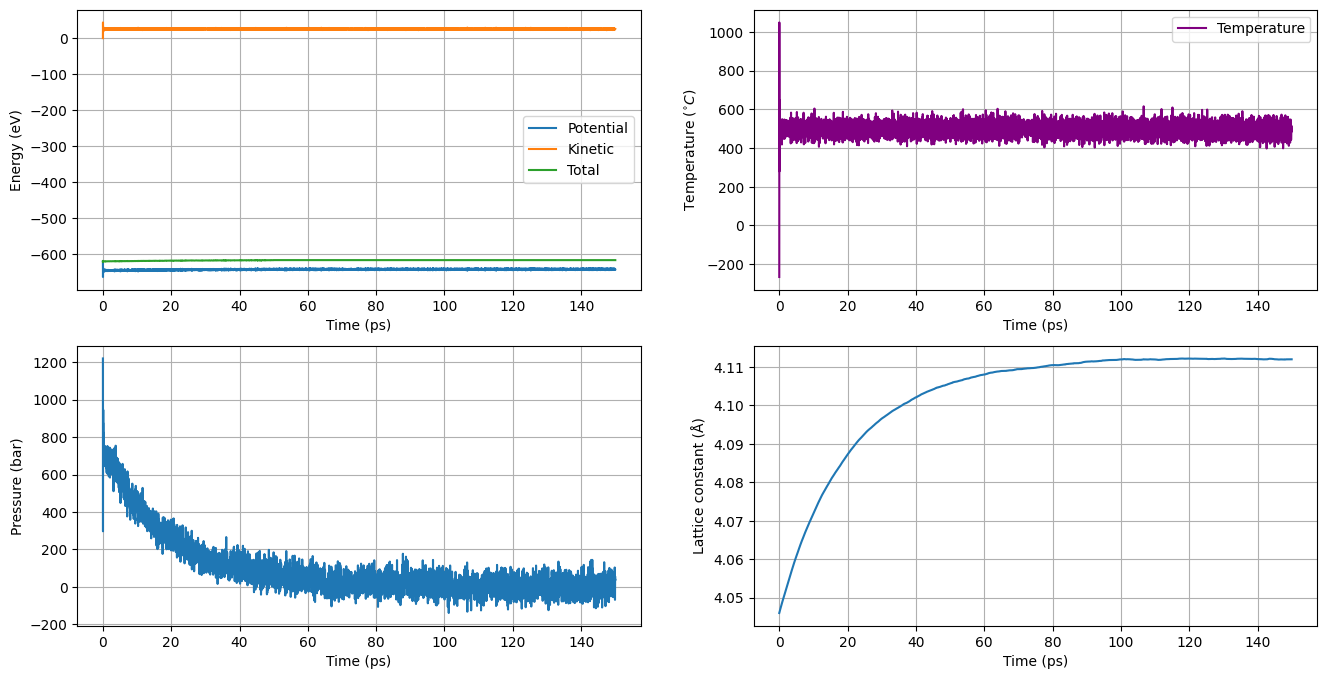

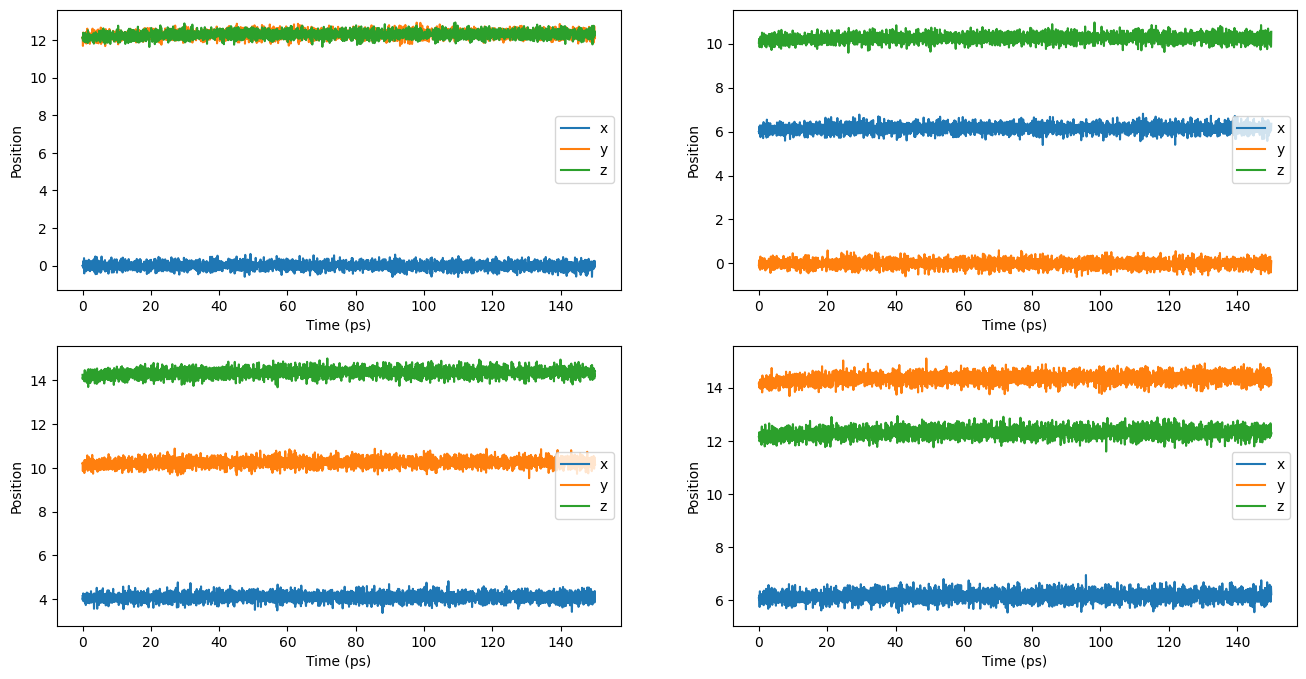

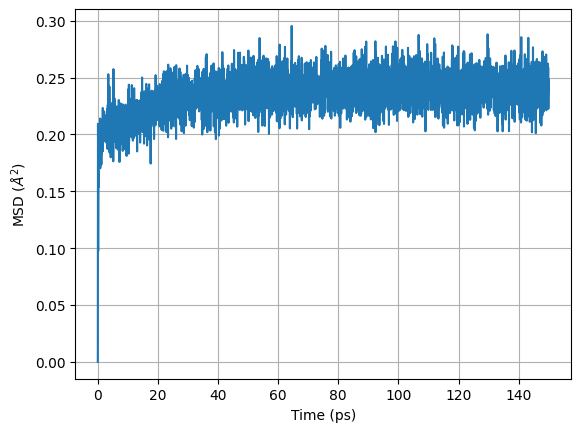

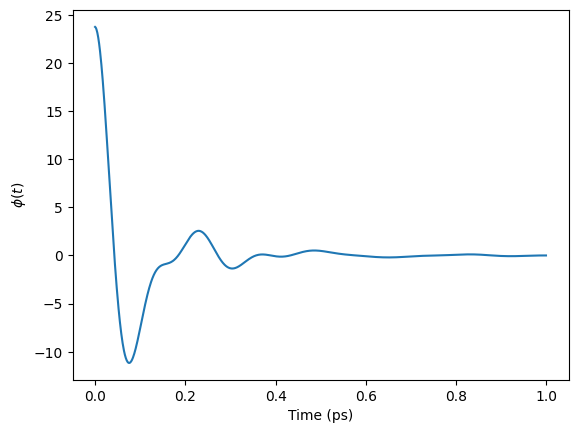

Average temperature: 696.2484C
Average pressure: 2.6143
Self diffusion coefficient: 0.00043


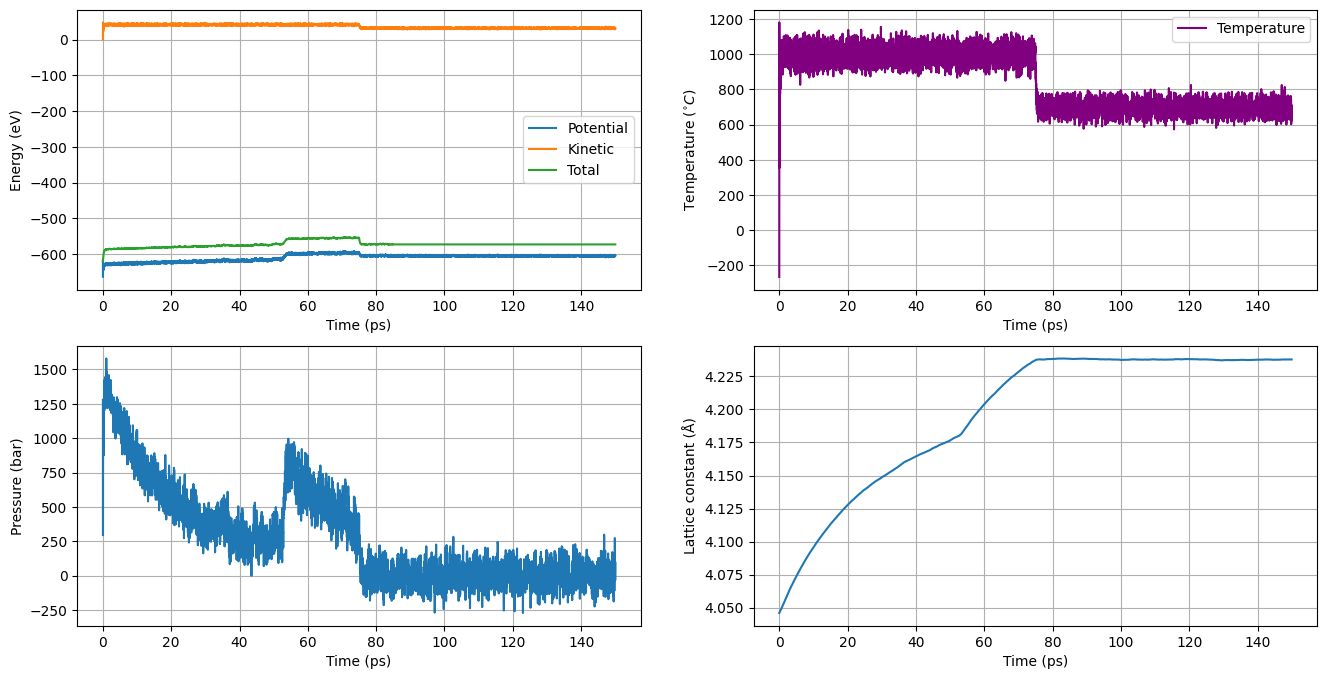

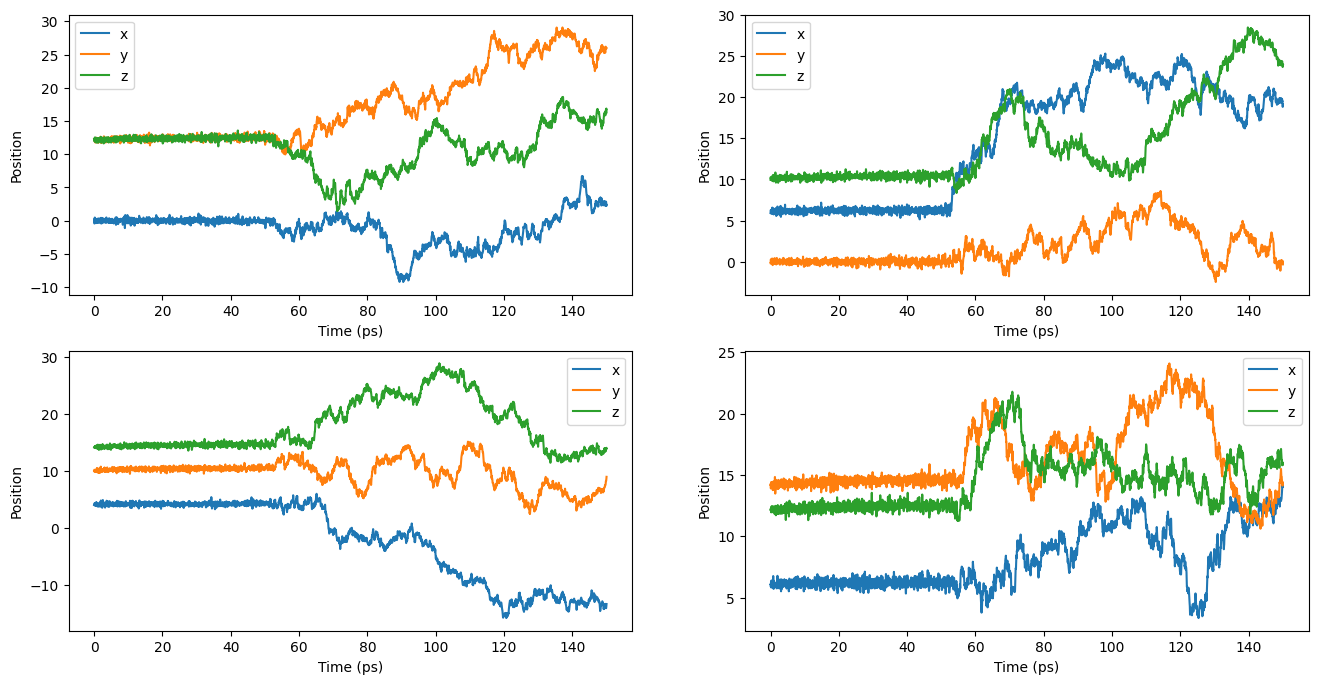

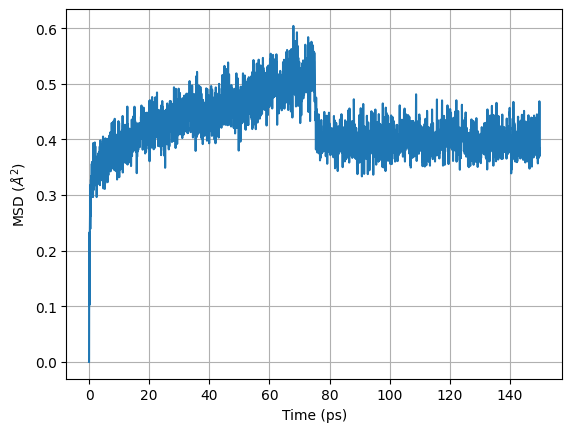

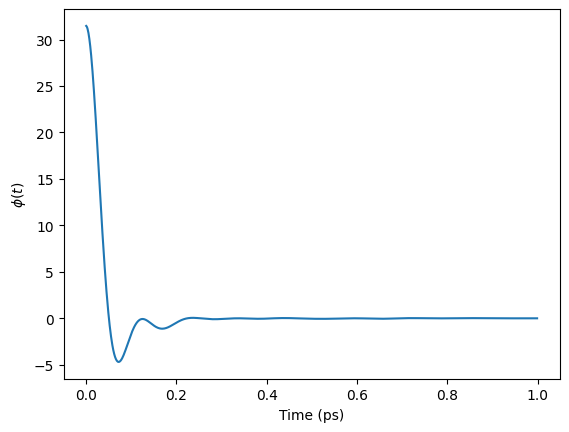

In [139]:
for data, dt, temp, p, position, velocities in zip(datas, dts, temperature, pressure, ps, vs):
    t = np.arange(0, data.shape[0]) * dt
    print(f"Average temperature: {np.mean(data[100000:, 2] - 273.15):.4f}C")
    print(f"Average pressure: {np.mean(data[100000:, 3]) / 0.00000624:.4f}")
    print(f"Self diffusion coefficient: {(data[-1, 17]) / (6 * data.shape[0] * dt):.5f}")
    plot(data, t, dt, temp, p)
    plot_positions(data, t, dt, temp, p)
    plot_misc(data[:, 17], t, "MSD ($Å^2$)")
    plot_velocity_correlation(velocities, dt)
    #plot_misc(np.cumsum(data[:, 18]) / (t / dt), t, "$\phi(t)$ / $\phi(0)$")